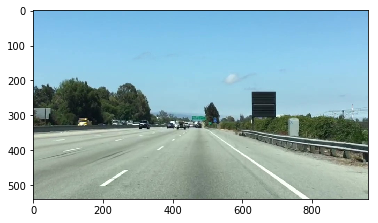

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [429]:
import matplotlib.pyplot as plt#matplotlib 是python的一個2D繪圖庫,# plt 用于显示图片
import matplotlib.image as mpimg# mpimg 用于读取图片
import numpy as np

#read image use 
image=mpimg.imread('/home/wuying/A-udacity/lesson2-4/test.jpg')
plt.imshow(image)  
plt.show() 
print('This image is: ',type(image), 
         'with dimensions:', image.shape)

In [430]:
#grap the x and y size and make copy of the image
ysize=image.shape[0]
xsize=image.shape[1]
color_select= np.copy(image)
line_image = np.copy(image)


In [431]:
#define color selection criteria
red_threshold=200
green_threshold=200
blue_threshold=200


In [432]:
rgb_threshold=[red_threshold,green_threshold,blue_threshold]

In [433]:
#define a traiangle region of interest
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

In [439]:
#all pixels that meet my color criterion (those above the threshold) will be retained, 
#and those that do not (below the threshold) will be blacked out.
color_thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])



In [440]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)


In [441]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [442]:
color_select[color_thresholds] = [0,0,0]
line_image[~color_thresholds & region_thresholds] = [255,0,0]

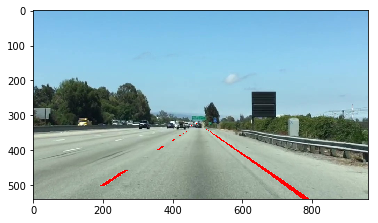

In [443]:
plt.imshow(color_select)
plt.imshow(line_image)